# Analysis

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("final_dataset.csv")
df.head(5)

,id,nome,ano_registo,type,n_reg,lat,lon,score
0,141,caldeireiros,2016,Apartamento,25307/AL,41.145349,-8.613683,"{'global': 9.0, 'staff': 8.5, 'commodities': 8..."
1,241,hospedaria do bonfim,2013,Estabelecimento de hospedagem,5644/AL,41.150024,-8.595375,"{'global': 6.6, 'staff': 7.4, 'commodities': 5..."
2,457,alegria rooms,2016,Estabelecimento de hospedagem,31660/AL,41.146709,-8.603717,"{'global': 8.2, 'staff': 8.8, 'commodities': 7..."
3,495,casa paraíso,2016,Apartamento,32765/AL,41.157550,-8.608751,"{'global': 9.5, 'staff': 10.0, 'commodities': ..."
4,582,o santo da lapa,2016,Moradia,31616/AL,41.158944,-8.613953,"{'global': 8.4, 'staff': 9.1, 'commodities': 8..."


# Clustering

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [58]:
kmeans = KMeans(n_clusters=2, random_state=0, algorithm="full").fit(df[["ano_registo", "lat", "lon"]])

In [56]:
kmeans.labels_

array([3, 2, 3, 3, 3, 3, 3, 7, 4, 5, 5, 5, 7, 7, 4, 4, 4, 0, 7, 7, 6, 7,
       0, 5, 0, 0, 0, 0, 7, 6, 6, 6, 6, 6, 1, 6, 6, 6, 6, 6, 1, 6, 1, 1,
       1, 1, 6])

In [54]:
centroids = kmeans.cluster_centers_
print(len(centroids))
centroids

8


array([[2017.        ,   41.14440819,   -8.61753481],
       [2018.        ,   41.14867583,   -8.61613459],
       [2013.        ,   41.1500239 ,   -8.59537474],
       [2016.        ,   41.15213794,   -8.60589247],
       [2017.        ,   41.16228991,   -8.64722228],
       [2017.        ,   41.14720802,   -8.60190722],
       [2018.        ,   41.15425077,   -8.60580113],
       [2017.        ,   41.15604987,   -8.60843394]])

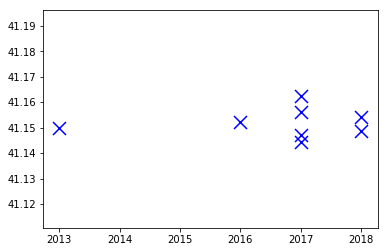

In [59]:
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, linewidths=3, color='b', zorder=10)
plt.show()

ideal clusters =  1 with a gain of 13.762268412858248


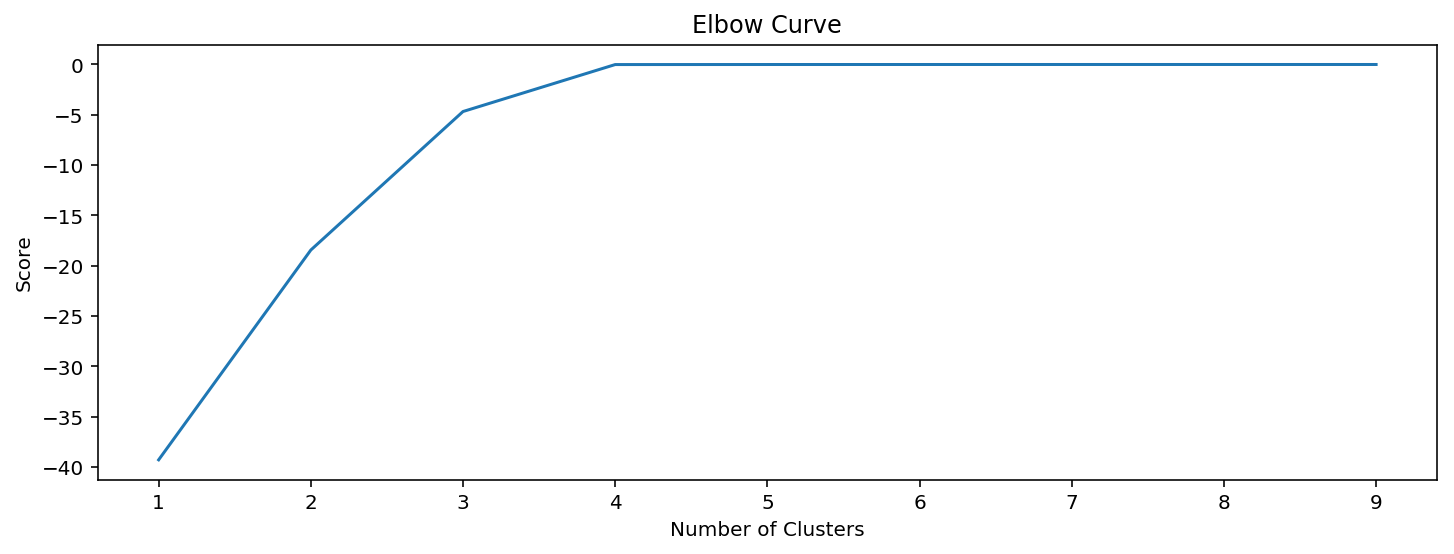

In [80]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

cl_df = df[["ano_registo", "lat", "lon"]]
Nc = range(1,10)
kmeans = [KMeans(n_clusters=i, random_state=0) for i in Nc]
score = [kmeans[i].fit(cl_df).score(cl_df) for i in range(len(kmeans))]

# calculate best k
var, start = [], score[0]
for s in score[1:]: var.append(abs(start-s)); start = s
var=var[1:]
print("ideal clusters = ", 1 + var.index(max(var)), "with a gain of", max(var))

# plot curve
plt.figure(figsize=(12,4))
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

# Regression